# Задача классификации
## Подготовка данных

In [2]:
import pandas as pd

data = pd.read_csv('D:/PythonWork/Machine learning and big data/data/diabet_processed.csv', encoding='utf-8', delimiter=',')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,True,True,True,40,True,False,False,False,False,...,True,False,5,18,15,True,False,9,4,3
1,0,False,False,False,25,True,False,False,True,False,...,False,True,3,0,0,False,False,7,6,1
2,0,True,True,True,28,False,False,False,False,True,...,True,True,5,30,30,True,False,9,4,8
3,0,True,False,True,27,False,False,False,True,True,...,True,False,2,0,0,False,False,11,3,6
4,0,True,True,True,24,False,False,False,True,True,...,True,False,2,3,0,False,False,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243828,0,False,False,True,27,False,False,False,False,False,...,True,False,1,0,0,False,False,3,6,5
243829,2,True,True,True,18,False,False,False,False,False,...,True,False,4,0,0,True,False,11,2,4
243830,0,False,False,True,28,False,False,False,True,True,...,True,False,1,0,0,False,False,2,5,2
243831,0,True,False,True,23,False,False,False,False,True,...,True,False,3,0,0,False,True,7,5,1


Целевой признак - `Diabetes_012`

Эта характеристика принимает значения 0, 1 или 2 => мультклассовая задача классификации.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243833 entries, 0 to 243832
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          243833 non-null  int64
 1   HighBP                243833 non-null  bool 
 2   HighChol              243833 non-null  bool 
 3   CholCheck             243833 non-null  bool 
 4   BMI                   243833 non-null  int64
 5   Smoker                243833 non-null  bool 
 6   Stroke                243833 non-null  bool 
 7   HeartDiseaseorAttack  243833 non-null  bool 
 8   PhysActivity          243833 non-null  bool 
 9   Fruits                243833 non-null  bool 
 10  Veggies               243833 non-null  bool 
 11  HvyAlcoholConsump     243833 non-null  bool 
 12  AnyHealthcare         243833 non-null  bool 
 13  NoDocbcCost           243833 non-null  bool 
 14  GenHlth               243833 non-null  int64
 15  MentHlth              243833 non-n

## Проверка баланса классов

<Axes: ylabel='Diabetes_012'>

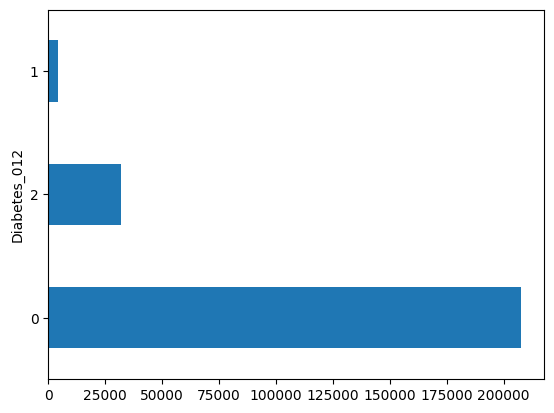

In [4]:
from imblearn.over_sampling import SMOTE

data.Diabetes_012.value_counts().plot.barh()

Распределение данных неравномерно.

Узнаем, сколько данных существует по каждой степени заболевания.

In [5]:
no_diab = data[(data.Diabetes_012 == 0)]
may_be_diab = data[(data.Diabetes_012 == 1)]
has_diab = data[(data.Diabetes_012 == 2)]

no_diab.shape, may_be_diab.shape, has_diab.shape

((207514, 22), (4340, 22), (31979, 22))

### Знакомство с факторами сахарного диабета

In [6]:
def get_feature(df):
    feat_df = data.T.drop(['Diabetes_012']).sum(axis=1).to_frame('value')
    feat_df = feat_df[(feat_df.T != 0).any()]
    feat_df = feat_df.sort_values(by='value', ascending=False, inplace=False)
    return feat_df

<Axes: >

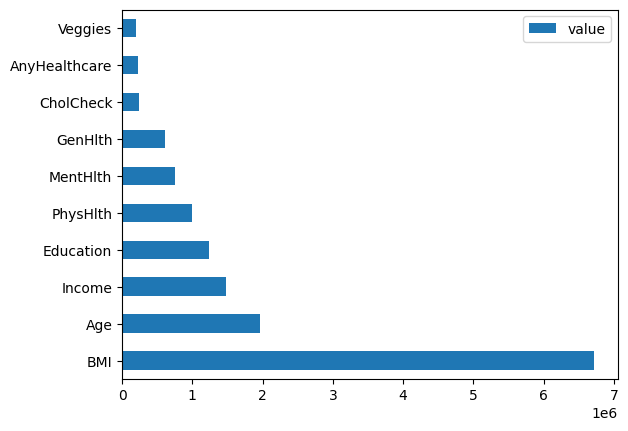

In [7]:
no_diab_feats = get_feature(no_diab)
no_diab_feats.head(10).plot.barh()

<Axes: >

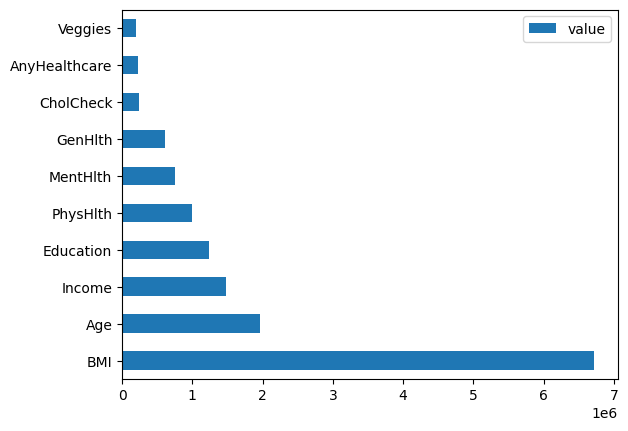

In [8]:
may_be_diab_feats = get_feature(may_be_diab)
may_be_diab_feats.head(10).plot.barh()

<Axes: >

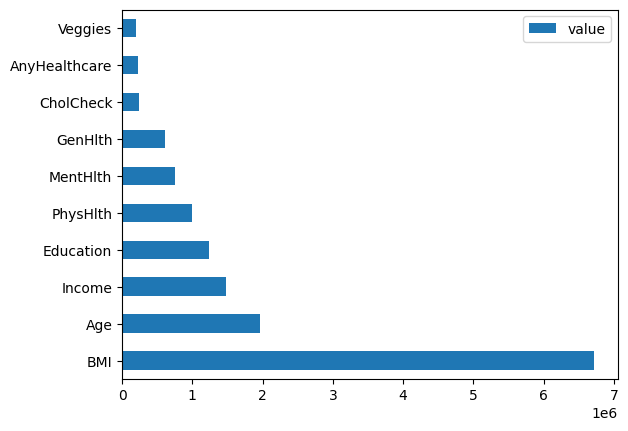

In [9]:
has_diab_feats = get_feature(has_diab)
has_diab_feats.head(10).plot.barh()

### Балансирование набора данных

In [10]:
oversample = SMOTE()

X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

tf_df, t_label_df = oversample.fit_resample(X, y)

t_label_df.value_counts()

Diabetes_012
0    207514
2    207514
1    207514
Name: count, dtype: int64

Количество различных значений сбалансировано

In [11]:
balanced_df = pd.concat([t_label_df, tf_df], axis=1, join='outer')
balanced_df.shape

(622542, 22)

In [12]:
balanced_df.to_csv('balanced_diabetes_data.csv')

In [11]:
bX = balanced_df.drop('Diabetes_012', axis=1)
by = balanced_df['Diabetes_012']

## Разделение данных на обучающую и тестовую выборки

### 1. Методом отложенной выборки (hold-out)

In [12]:
from sklearn.model_selection import train_test_split

X_ho_train, X_ho_test, y_ho_train, y_ho_test = train_test_split(bX, by, test_size=0.2, random_state=42, stratify=by)

### 2. Методом k-fold

In [13]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X):
    X_kf_train, X_kf_test = bX.iloc[train_index], bX.iloc[test_index]
    y_kf_train, y_kf_test = by.iloc[train_index], by.iloc[test_index]


## Решение задачи классификации


## Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_ho_train, y_ho_train)
predictions = lr.predict(X_ho_test)

print(classification_report(y_ho_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_ho_test, predictions, average='micro'))
print('Confusion matrix:\n', confusion_matrix(y_ho_test, predictions))

d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.60      0.67      0.63     41503
           1       0.51      0.48      0.49     41503
           2       0.52      0.49      0.50     41503

    accuracy                           0.54    124509
   macro avg       0.54      0.54      0.54    124509
weighted avg       0.54      0.54      0.54    124509

Predicted labels:  [1 2 1 ... 1 2 0]
F1-score:  0.54421768707483
Confusion matrix:
 [[27683  6772  7048]
 [ 9717 19776 12010]
 [ 8716 12486 20301]]


d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Подбор гиперпараметров для Логистической регрессии

### GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] 
}

grid_search = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5, scoring='f1_micro')
grid_search.fit(X_ho_train[:4000], y_ho_train[:4000])

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Лучшие гиперпараметры: {best_params}')
print(f'Лучшая оценка F1-микро: {grid_search.best_score_:.4f}')

test_predictions = best_estimator.predict(X_ho_test[:2000])
print(classification_report(y_ho_test[:2000], test_predictions))
print(confusion_matrix(y_ho_test[:2000], test_predictions))

d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

Лучшие гиперпараметры: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Лучшая оценка F1-микро: 0.5428
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       668
           1       0.52      0.46      0.49       644
           2       0.54      0.53      0.53       688

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000

[[443  98 127]
 [162 298 184]
 [152 172 364]]


d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=100),
    param_distributions=param_distributions,
    n_iter=10,  
    cv=5,
    scoring='f1_micro',
    random_state=42
)

random_search.fit(X_ho_train[:4000], y_ho_train[:4000])

best_random_params = random_search.best_params_
best_random_estimator = random_search.best_estimator_

print(f'Лучшие гиперпараметры: {best_random_params}')
print(f'Лучшая оценка F1-микро: {random_search.best_score_:.4f}')

test_predictions_random = best_random_estimator.predict(X_ho_test[:2000])
print(classification_report(y_ho_test[:2000], test_predictions_random))
print(confusion_matrix(y_ho_test[:2000], test_predictions_random))

d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

Лучшие гиперпараметры: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Лучшая оценка F1-микро: 0.5427
              precision    recall  f1-score   support

           0       0.57      0.66      0.62       668
           1       0.54      0.45      0.49       644
           2       0.54      0.54      0.54       688

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000

[[443  98 127]
 [165 292 187]
 [163 154 371]]


### Optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

def objective(trial):
    params = {
        'C': trial.suggest_float('C', 0.001, 10, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga'])
    }

    model = LogisticRegression(**params, max_iter=100)
    scores = cross_val_score(model, X_ho_train[:4000], y_ho_train[:4000], cv=5, scoring='f1_micro')
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

best_optuna_params = study.best_params
best_optuna_value = study.best_value

print(f'Лучшие гиперпараметры: {best_optuna_params}')
print(f'Лучшее среднее значение F1-микро: {best_optuna_value:.4f}')

final_model = LogisticRegression(**best_optuna_params, max_iter=100)
final_model.fit(X_ho_train, y_ho_train)

test_predictions_optuna = final_model.predict(X_ho_test[:2000])
print(classification_report(y_ho_test[:2000], test_predictions_optuna))
print(confusion_matrix(y_ho_test[:2000], test_predictions_optuna))

[I 2025-04-20 19:37:26,533] A new study created in memory with name: no-name-25978945-823c-45a3-a9a1-aff1dfbabebb
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\lin

Лучшие гиперпараметры: {'C': 0.236748002321402, 'penalty': 'l1', 'solver': 'liblinear'}
Лучшее среднее значение F1-микро: 0.5437
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       668
           1       0.53      0.49      0.51       644
           2       0.54      0.53      0.54       688

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000

[[438 101 129]
 [149 313 182]
 [143 180 365]]


## KNN
### и проверка собственных функций

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from my_classification_metrics import calculate_precision, calculate_recall, calculate_accuracy, calculate_f1, get_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score


knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn.fit(X_ho_train, y_ho_train)

predictions = knn.predict(X_ho_test[:2000])

print(classification_report(y_ho_test[:2000], predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_ho_test[:2000], predictions, average='macro'))
print('Confusion matrix:\n', confusion_matrix(y_ho_test[:2000], predictions))
print('Accuracy ', accuracy_score(y_ho_test[:2000], predictions))
print('Precision ', precision_score(y_ho_test[:2000], predictions, average='macro'))
print('Recall ', recall_score(y_ho_test[:2000], predictions, average='macro'))

print()

print('My accuracy ', calculate_accuracy(y_ho_test[:2000], predictions))
print('My precision (micro) ', calculate_precision(y_ho_test[:2000], predictions, average='micro'))
print('My precision (macro) ', calculate_precision(y_ho_test[:2000], predictions, average='macro'))
print('My recall (micro) ', calculate_recall(y_ho_test[:2000], predictions, average='micro'))
print('My recall (macro) ', calculate_recall(y_ho_test[:2000], predictions, average='macro'))
print('My f1 (micro) ', calculate_f1(y_ho_test[:2000], predictions, average='micro'))
print('My f1 (macro) ', calculate_f1(y_ho_test[:2000], predictions, average='macro'))
print(get_confusion_matrix(y_ho_test[:2000], predictions))



              precision    recall  f1-score   support

           0       0.90      0.60      0.72       668
           1       0.80      1.00      0.89       644
           2       0.80      0.87      0.83       688

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.81      2000
weighted avg       0.83      0.82      0.81      2000

Predicted labels:  [0 1 1 ... 0 0 2]
F1-score:  0.8144557299681954
Confusion matrix:
 [[403 114 151]
 [  2 641   1]
 [ 43  45 600]]
Accuracy  0.822
Precision  0.8328919706180344
Recall  0.8235760171120997

My accuracy  0.822
My precision (micro)  0.822
My precision (macro)  0.8328919706180344
My recall (micro)  0.822
My recall (macro)  0.8235760171120997
My f1 (micro)  0.822
My f1 (macro)  0.8144557299681954
[[403, 114, 151], [2, 641, 1], [43, 45, 600]]


### GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, classification_report

param_grid = {
    'n_neighbors': list(range(1, 21)),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

model = KNeighborsClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_micro')

grid_search.fit(X_ho_train[:4000], y_ho_train[:4000])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Лучшие гиперпараметры: {best_params}')
print(f'Лучшая оценка F1-микро: {best_score:.4f}')

best_knn = grid_search.best_estimator_
test_predictions = best_knn.predict(X_ho_test[:2000])
print(classification_report(y_ho_test[:2000], test_predictions))
print(confusion_matrix(y_ho_test[:2000], test_predictions))

Лучшие гиперпараметры: {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}
Лучшая оценка F1-микро: 0.5310
              precision    recall  f1-score   support

           0       0.61      0.51      0.56       668
           1       0.50      0.59      0.54       644
           2       0.54      0.53      0.54       688

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000

[[344 178 146]
 [102 382 160]
 [117 205 366]]


### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_neighbors': range(1, 21),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

model = KNeighborsClassifier()

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=50,  
    cv=5,
    scoring='f1_micro',
    random_state=42
)

random_search.fit(X_ho_train[:4000], y_ho_train[:4000])

best_random_params = random_search.best_params_
best_random_score = random_search.best_score_

print(f'Лучшие гиперпараметры: {best_random_params}')
print(f'Лучшая оценка F1-микро: {best_random_score:.4f}')

best_random_knn = random_search.best_estimator_
test_predictions_random = best_random_knn.predict(X_ho_test[:2000])
print(classification_report(y_ho_test[:2000], test_predictions_random))
print(confusion_matrix(y_ho_test[:2000], test_predictions_random))

Лучшие гиперпараметры: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}
Лучшая оценка F1-микро: 0.5388
              precision    recall  f1-score   support

           0       0.63      0.50      0.56       668
           1       0.48      0.60      0.53       644
           2       0.52      0.50      0.51       688

    accuracy                           0.53      2000
   macro avg       0.54      0.53      0.53      2000
weighted avg       0.54      0.53      0.53      2000

[[337 184 147]
 [ 93 387 164]
 [103 243 342]]


### Optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 20),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan'])
    }

    model = KNeighborsClassifier(**params)

    scores = cross_val_score(model, X_ho_train[:4000], y_ho_train[:4000], cv=5, scoring='f1_micro')
    return scores.mean()

study = optuna.create_study(direction="maximize") 
study.optimize(objective, n_trials=100)

best_optuna_params = study.best_params
best_optuna_value = study.best_value

print(f'Лучшие гиперпараметры: {best_optuna_params}')
print(f'Средняя оценка F1-микро: {best_optuna_value:.4f}')

final_model = KNeighborsClassifier(**best_optuna_params)
final_model.fit(X_ho_train, y_ho_train)

test_predictions_optuna = final_model.predict(X_ho_test[:2000])
print(classification_report(y_ho_test[:2000], test_predictions_optuna))
print(confusion_matrix(y_ho_test[:2000], test_predictions_optuna))

[I 2025-04-20 19:51:16,571] A new study created in memory with name: no-name-8aad09d2-79e4-4b4b-a4a1-a648e26e6469
[I 2025-04-20 19:51:16,853] Trial 0 finished with value: 0.5062499999999999 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5062499999999999.
[I 2025-04-20 19:51:17,138] Trial 1 finished with value: 0.49725 and parameters: {'n_neighbors': 16, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.5062499999999999.
[I 2025-04-20 19:51:17,423] Trial 2 finished with value: 0.50575 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5062499999999999.
[I 2025-04-20 19:51:17,616] Trial 3 finished with value: 0.5097499999999999 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 3 with value: 0.5097499999999999.
[I 2025-04-20 19:51:17,872] Trial 4 finished with value: 0.50175 and parameters: {

Лучшие гиперпараметры: {'n_neighbors': 14, 'weights': 'distance', 'metric': 'manhattan'}
Средняя оценка F1-микро: 0.5310
              precision    recall  f1-score   support

           0       0.95      0.58      0.72       668
           1       0.83      1.00      0.90       644
           2       0.79      0.94      0.86       688

    accuracy                           0.84      2000
   macro avg       0.86      0.84      0.83      2000
weighted avg       0.86      0.84      0.83      2000

[[390 112 166]
 [  1 641   2]
 [ 20  21 647]]


### Собственная реализация KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from my_knn import MyKNN


knn = MyKNN(n_neighbors=10, p=2)
knn.fit(X_ho_train, y_ho_train)

predictions = knn.predict(X_ho_test[:2000])

print(classification_report(y_ho_test[:2000], predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_ho_test[:2000], predictions, average='macro'))
print('Confusion matrix:\n', confusion_matrix(y_ho_test[:2000], predictions))
print('Accuracy ', accuracy_score(y_ho_test[:2000], predictions))
print('Precision ', precision_score(y_ho_test[:2000], predictions, average='macro'))
print('Recall ', recall_score(y_ho_test[:2000], predictions, average='macro'))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71       668
           1       0.80      0.99      0.88       644
           2       0.79      0.89      0.83       688

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.81      2000
weighted avg       0.83      0.82      0.81      2000

Predicted labels:  [0 1 1 ... 0 0 0]
F1-score:  0.8087511983742948
Confusion matrix:
 [[388 117 163]
 [  4 636   4]
 [ 33  44 611]]
Accuracy  0.8175
Precision  0.8320935639805075
Recall  0.8188324528178944


### Наивный Байесовский классификатор

In [ ]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_ho_train, y_ho_train)
y_pred = gnb.predict(X_ho_test[:2000])
print(classification_report(y_ho_test[:2000], y_pred))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_ho_test[:2000], y_pred, average='micro'))
print('Confusion matrix:\n', confusion_matrix(y_ho_test[:2000], y_pred))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53       668
           1       0.42      0.73      0.53       644
           2       0.54      0.37      0.44       688

    accuracy                           0.51      2000
   macro avg       0.56      0.51      0.50      2000
weighted avg       0.56      0.51      0.50      2000

Predicted labels:  [0 1 1 ... 0 0 2]
F1-score:  0.505
Confusion matrix:
 [[282 280 106]
 [ 62 473 109]
 [ 47 386 255]]


## SVM

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_ho_train[:8000], y_ho_train[:8000])

y_pred = clf.predict(X_ho_test[:2000])
print(classification_report(y_ho_test[:2000], y_pred))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_ho_test[:2000], y_pred, average='micro'))
print('Confusion matrix:\n', confusion_matrix(y_ho_test[:2000], y_pred))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       668
           1       0.48      0.41      0.44       644
           2       0.52      0.58      0.55       688

    accuracy                           0.53      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.53      0.52      2000

Predicted labels:  [0 1 1 ... 0 0 2]
F1-score:  0.5265
Confusion matrix:
 [[395 125 148]
 [167 262 215]
 [128 164 396]]


### GridSearchCV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score


param_grid = {
    'C': [0.1, 10],
    'kernel': ['linear', 'poly', 'rbf'],  
}

svc = SVC(probability=True)

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='f1_micro')

grid_search.fit(X_ho_train[:1000], y_ho_train[:1000])

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Лучшие гиперпараметры: {best_params}')
print(f'Лучшая оценка F1-микро: {best_score:.4f}')

best_svc = grid_search.best_estimator_
test_predictions = best_svc.predict(X_ho_test[:500])
print(classification_report(y_ho_test[:500], test_predictions))
print(confusion_matrix(y_ho_test[:500], test_predictions))

Лучшие гиперпараметры: {'C': 10, 'kernel': 'linear'}
Лучшая оценка F1-микро: 0.5210
              precision    recall  f1-score   support

           0       0.64      0.59      0.62       174
           1       0.42      0.44      0.43       162
           2       0.49      0.51      0.50       164

    accuracy                           0.52       500
   macro avg       0.52      0.51      0.52       500
weighted avg       0.52      0.52      0.52       500

[[103  33  38]
 [ 41  72  49]
 [ 16  65  83]]


### RandomizedSearchCV

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score

param_distributions = {
    'C': [0.1, 10],
    'kernel': ['linear', 'poly', 'rbf'],  
}

svc = SVC(probability=True)

random_search = RandomizedSearchCV(
    svc,
    param_distributions=param_distributions,
    n_iter=50, 
    cv=5,
    scoring='f1_micro',
    random_state=42
)

random_search.fit(X_ho_train[:1000], y_ho_train[:1000])

best_random_params = random_search.best_params_
best_random_score = random_search.best_score_

print(f'Лучшие гиперпараметры: {best_random_params}')
print(f'Лучшая оценка F1-микро: {best_random_score:.4f}')

best_random_svc = random_search.best_estimator_
test_predictions_random = best_random_svc.predict(X_ho_test[:500])
print(classification_report(y_ho_test[:500], test_predictions_random))
print(confusion_matrix(y_ho_test[:500], test_predictions_random))

d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие гиперпараметры: {'kernel': 'linear', 'C': 10}
Лучшая оценка F1-микро: 0.5250
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       174
           1       0.55      0.44      0.49       162
           2       0.53      0.68      0.60       164

    accuracy                           0.57       500
   macro avg       0.57      0.57      0.57       500
weighted avg       0.58      0.57      0.57       500

[[103  29  42]
 [ 35  72  55]
 [ 23  30 111]]


### Модель классификаторов

In [ ]:
import numpy as np

C = 10

classifiers = {
    'Linear Regression': LogisticRegression(multi_class='multinomial'),
    'KNN': KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2),
    'NaiveBayes': GaussianNB(),
    'SVC': svm.SVC(),
    'Linear SVC': svm.SVC(kernel='linear', C=C, probability=True, random_state=0),
    'Polynomial SVC': svm.SVC(kernel='poly', C=C, probability=True, random_state=0),
    'RBF SVC': svm.SVC(kernel='rbf', C=C, probability=True, random_state=0),
    'Sigmoid SVC': svm.SVC(kernel='sigmoid', C=C, probability=True, random_state=0),
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()): 
    print(name)
    if 'SVC' in name:
        classifier.fit(X_ho_train[:8000], np.ravel(y_ho_train[:8000]))
    else:
        classifier.fit(X_ho_train, np.ravel(y_ho_train))

    y_pred = classifier.predict(X_ho_test[:2000])
    print(classification_report(y_ho_test[:2000], y_pred))
    
    print('F1-score: ', f1_score(y_ho_test[:2000], y_pred, average='micro'))
    print('Confusion matrix:\n', confusion_matrix(y_ho_test[:2000], y_pred))
    print()

Linear Regression


d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.59      0.65      0.62       668
           1       0.48      0.49      0.49       644
           2       0.52      0.45      0.48       688

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000

F1-score:  0.532
Confusion matrix:
 [[437 119 112]
 [155 318 171]
 [154 225 309]]

KNN
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       668
           1       0.80      1.00      0.89       644
           2       0.80      0.87      0.83       688

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.81      2000
weighted avg       0.83      0.82      0.81      2000

F1-score:  0.822
Confusion matrix:
 [[403 114 151]
 [  2 641   1]
 [ 43  45 600]]

NaiveBayes
              precision    recall  f1-score   support

  

## Визуализация

Рассмотрим зависимость точности (accuracy) модели KNN от количества "соседей"

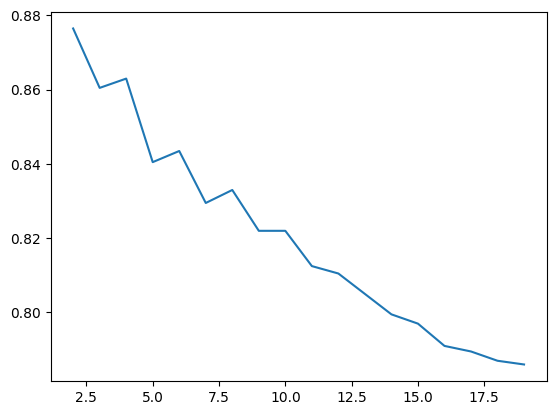

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


x_vals = []
y_vals = []

for nn in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=nn, metric='minkowski', p=2)
    knn.fit(X_ho_train, y_ho_train)

    predictions = knn.predict(X_ho_test[:2000])
    score = accuracy_score(y_ho_test[:2000], predictions)
    x_vals.append(nn)
    y_vals.append(score)
    
plt.plot(x_vals, y_vals)

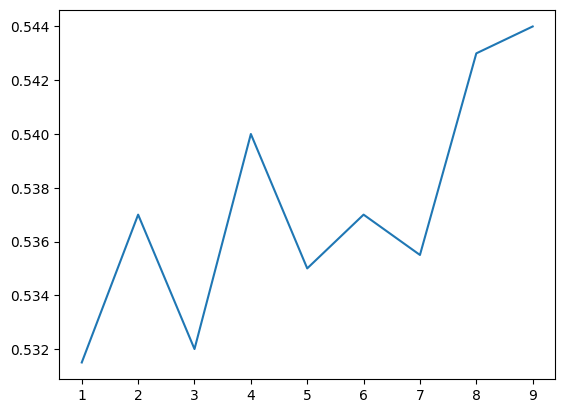

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


x_vals = []
y_vals = []

for p_val in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=p_val)
    knn.fit(X_ho_train[:10000], y_ho_train[:10000])

    predictions = knn.predict(X_ho_test[:2000])
    score = accuracy_score(y_ho_test[:2000], predictions)
    x_vals.append(p_val)
    y_vals.append(score)
    
plt.plot(x_vals, y_vals)

Рассмотрим зависимость точности (accuracy) модели Логистической регрессии от величины штрафа C

d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\PythonWork\Machine learning and big data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated

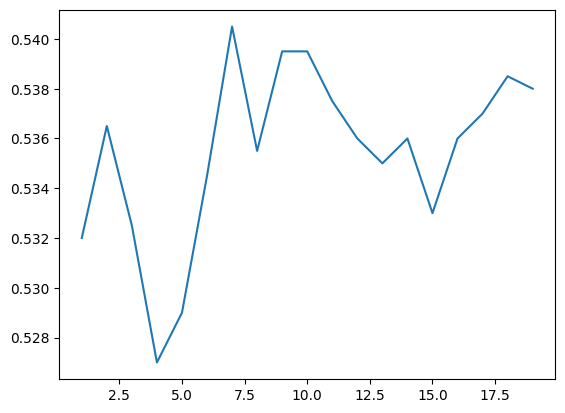

In [ ]:
from sklearn.linear_model import LogisticRegression


x_vals = []
y_vals = []

for c in range(1, 20):
    lr = LogisticRegression(multi_class='multinomial', C=c)
    lr.fit(X_ho_train, y_ho_train)
    predictions = lr.predict(X_ho_test[:2000])
    
    score = accuracy_score(y_ho_test[:2000], predictions)
    x_vals.append(c)
    y_vals.append(score)

plt.plot(x_vals, y_vals)

Рассмотрим зависимость точности (accuracy) модели SVC от величины штрафа C

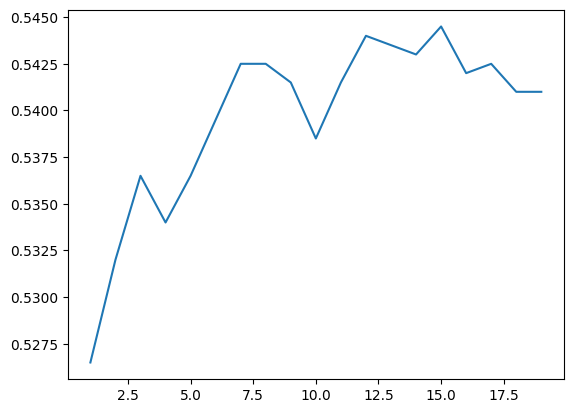

In [ ]:
from sklearn import svm

x_vals = []
y_vals = []

for c in range(1, 20):

    clf = svm.SVC(C=c)
    clf.fit(X_ho_train[:8000], y_ho_train[:8000])
    y_pred = clf.predict(X_ho_test[:2000])
    
    score = accuracy_score(y_ho_test[:2000], y_pred)
    x_vals.append(c)
    y_vals.append(score)
    
plt.plot(x_vals, y_vals)

## Вывод:
Наилучшей моделью классификации оказался KNN, т.к. у этой модели наибольшая accuracy среди остальных моделей.